In [1]:
import scipy as sci
import joblib as job
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV, MultiTaskLasso, MultiTaskElasticNetCV
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb
from  xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

#import statsmodels.api as sm


In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras 
from tensorflow.keras import layers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [3]:
%store -r glulamFeatures_traina
%store -r glulamFeatures_testa
%store -r glulamMargin_traina
%store -r glulamMargin_testa

# Linear Regression  regularization or cross validation (LASSO)

lin_model1allL = LassoCV(cv=10,verbose=0,normalize=True,eps=0.000001,n_alphas=7, tol=0.0001,max_iter=50000000)


lin_model1allL.fit(glulamFeatures_traina, glulamMargin_traina)

Margin_pred_model1allL = lin_model1allL.predict(glulamFeatures_traina)

Train_Predict
print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allL), 2))

pd.set_option('display.max_rows', None)
coeff_model1allL = pd.DataFrame(lin_model1allL.coef_[0:230], index=glulamFeatures_traina.columns[0:230], 
                          columns=['glulamMargin_traina'])
coeff_model1allL

LogisticRegression

In [4]:
lin_model1al4logistics= LogisticRegression(solver='liblinear', C=100.0, random_state=0).fit(glulamFeatures_traina,glulamMargin_traina)
#lin_model1al4logistics.coef_

lin_model1al4logistics.predict_proba(glulamFeatures_traina)

lin_model1al4logistics.predict(glulamFeatures_traina)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

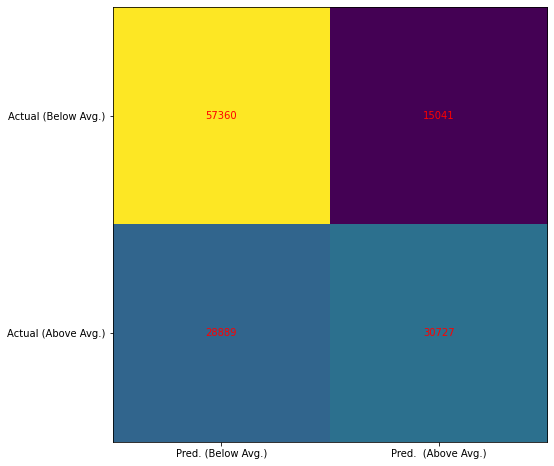

              precision    recall  f1-score   support

           0       0.67      0.79      0.72     72401
           1       0.67      0.52      0.58     59616

    accuracy                           0.67    132017
   macro avg       0.67      0.65      0.65    132017
weighted avg       0.67      0.67      0.66    132017



In [5]:
cm = confusion_matrix(glulamMargin_traina, lin_model1al4logistics.predict(glulamFeatures_traina))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred. (Below Avg.)', 'Pred.  (Above Avg.)'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual (Below Avg.)', 'Actual (Above Avg.)'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(glulamMargin_traina, lin_model1al4logistics.predict(glulamFeatures_traina)))

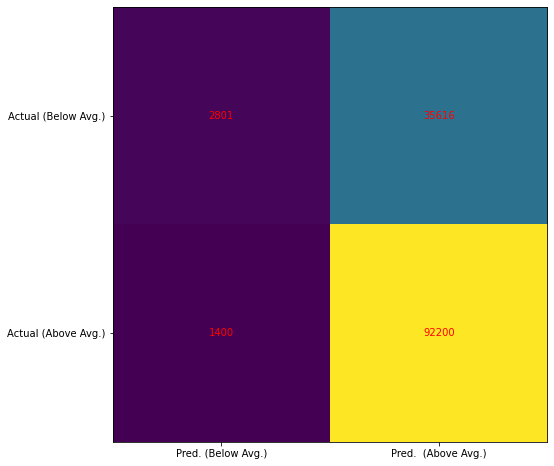

              precision    recall  f1-score   support

           0       0.67      0.07      0.13     38417
           1       0.72      0.99      0.83     93600

    accuracy                           0.72    132017
   macro avg       0.69      0.53      0.48    132017
weighted avg       0.71      0.72      0.63    132017



In [6]:

#Test
cm = confusion_matrix(glulamMargin_testa, lin_model1al4logistics.predict(glulamFeatures_testa))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred. (Below Avg.)', 'Pred.  (Above Avg.)'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual (Below Avg.)', 'Actual (Above Avg.)'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(glulamMargin_testa, lin_model1al4logistics.predict(glulamFeatures_testa)))

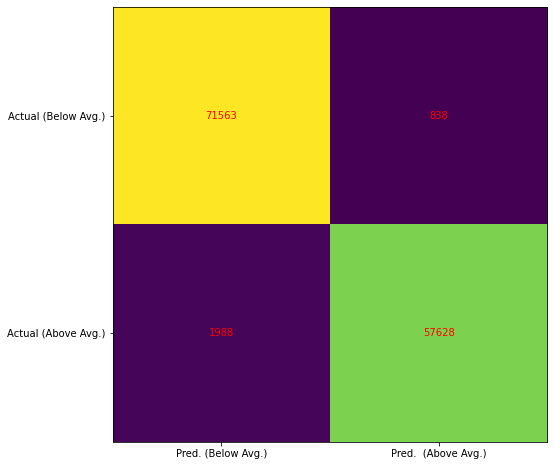

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     72401
           1       0.99      0.97      0.98     59616

    accuracy                           0.98    132017
   macro avg       0.98      0.98      0.98    132017
weighted avg       0.98      0.98      0.98    132017



In [7]:

lin_model1allDecisionTree= DecisionTreeClassifier(random_state=0)
lin_model1allDecisionTree.fit(glulamFeatures_traina,glulamMargin_traina)
lin_model1allDecisionTree_Score=lin_model1allDecisionTree.score(glulamFeatures_traina,glulamMargin_traina)
lin_model1allDecisionTree_Score



#lin_model1al4logistics= LogisticRegression(solver='liblinear', C=100.0, random_state=0).fit(glulamFeatures_traina,glulamMargin_traina)
#lin_model1al4logistics.coef_

#lin_model1al4logistics.predict_proba(glulamFeatures_traina)

#lin_model1al4logistics.predict(glulamFeatures_traina)



cm = confusion_matrix(glulamMargin_traina, lin_model1allDecisionTree.predict(glulamFeatures_traina))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred. (Below Avg.)', 'Pred.  (Above Avg.)'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual (Below Avg.)', 'Actual (Above Avg.)'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


print(classification_report(glulamMargin_traina, lin_model1allDecisionTree.predict(glulamFeatures_traina)))

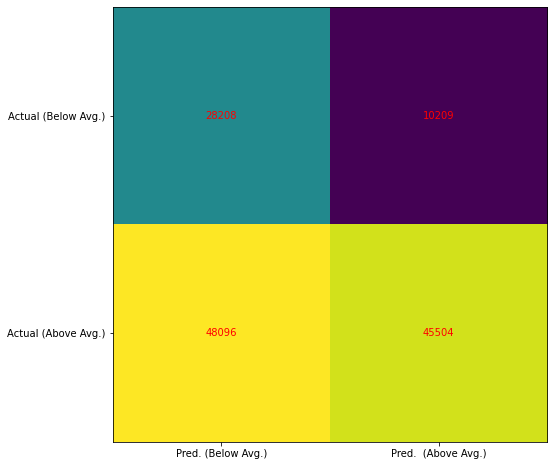

              precision    recall  f1-score   support

           0       0.37      0.73      0.49     38417
           1       0.82      0.49      0.61     93600

    accuracy                           0.56    132017
   macro avg       0.59      0.61      0.55    132017
weighted avg       0.69      0.56      0.58    132017



In [8]:

#Test
cm = confusion_matrix(glulamMargin_testa, lin_model1allDecisionTree.predict(glulamFeatures_testa))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred. (Below Avg.)', 'Pred.  (Above Avg.)'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual (Below Avg.)', 'Actual (Above Avg.)'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(glulamMargin_testa, lin_model1allDecisionTree.predict(glulamFeatures_testa)))


#RandomForest

In [9]:
lin_model1al4RandomeForest=  RandomForestClassifier(n_estimators=120)
lin_model1al4RandomeForest.fit(glulamFeatures_traina,glulamMargin_traina)
lin_model1al4RandomeForest.score(glulamFeatures_traina,glulamMargin_traina)
#lin_model1al4RandomeForest.score(glulamFeatures_testa, glulamMargin_testa)
#ceff_model1alRandomforest= pd.DataFrame(lin_model1al4RandomeForest.coef_[0:29], index=glulamFeatures_traina.columns[0:29], columns=['RandomForest Model coefficients'])
#ceff_model1alRandomforest


cm = confusion_matrix(glulamMargin_traina, lin_model1al4RandomeForest.predict(glulamFeatures_traina))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred. (Below Avg.)', 'Pred.  (Above Avg.)'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual (Below Avg.)', 'Actual (Above Avg.)'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


print(classification_report(glulamMargin_traina, lin_model1al4RandomeForest.predict(glulamFeatures_traina)))


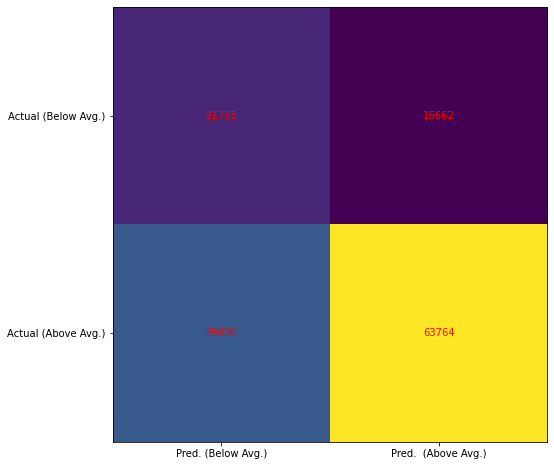

              precision    recall  f1-score   support

           0       0.42      0.57      0.48     38417
           1       0.79      0.68      0.73     93600

    accuracy                           0.65    132017
   macro avg       0.61      0.62      0.61    132017
weighted avg       0.68      0.65      0.66    132017



In [ ]:

#Test
cm = confusion_matrix(glulamMargin_testa, lin_model1al4RandomeForest.predict(glulamFeatures_testa))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred. (Below Avg.)', 'Pred.  (Above Avg.)'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual (Below Avg.)', 'Actual (Above Avg.)'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(glulamMargin_testa, lin_model1al4RandomeForest.predict(glulamFeatures_testa)))

Neural Net

In [ ]:

model = Sequential([
    Dense(16, input_shape=(234,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
#optimizer=tf.keras.optimizer.RMSprop(0.001)
model.compile(Adam(lr=.0001), loss='mse', metrics=['mae','mse'])
Epochs=10
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(glulamFeatures_traina, glulamMargin_traina, batch_size=10, epochs=Epochs, validation_split=0.2, shuffle=True, verbose=2, callbacks=[early_stop])

C:\Users\ShodipeO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/1000


In [ ]:
#Train_Predict
Margin_pred_model1allNeuralNet= model.predict(glulamFeatures_traina)


#Train_data

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allNeuralNet), 2))

In [ ]:
#Test_data
Margin_pred_model1allNeuralNet= model.predict(glulamFeatures_testa)
print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_testa, Margin_pred_model1allNeuralNet), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_testa, Margin_pred_model1allNeuralNet), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_testa, Margin_pred_model1allNeuralNet ), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_testa, Margin_pred_model1allNeuralNet ), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_testa,Margin_pred_model1allNeuralNet), 2))

In [ ]:

model = Sequential([
    Dense(16, input_shape=(29,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
#optimizer=tf.keras.optimizer.RMSprop(0.001)
model.compile(Adam(lr=.0001), loss='mse', metrics=['mae','mse'])
Epochs=1000
#early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(glulamFeatures_traina, glulamMargin_traina, batch_size=10, epochs=Epochs,  shuffle=True, verbose=2)
#Train_Predict
Margin_pred_model1allNeuralNet= model.predict(glulamFeatures_traina)


#Train_data

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allNeuralNet), 2))


In [ ]:
#Re-run the model to visualize and so,  save the model in
lin_model1allNeuralNet=model.fit(glulamFeatures_traina, glulamMargin_traina, batch_size=10, epochs=Epochs, validation_split=0.2, shuffle=True, verbose=2, callbacks=[early_stop])
 

#Visuals lin_model1allNeuralNet.history
NeuralNetVisuals= pd.DataFrame(lin_model1allNeuralNet.history)
NeuralNetVisuals['Epoch']= lin_model1allNeuralNet.epoch
NeuralNetVisuals.tail()

def plot_in_model1allNeuralNet(history):
    NeuralNetVisuals=pd.DataFrame(lin_model1allNeuralNet.history)
    NeuralNetVisuals['epoch']= lin_model1allNeuralNet.epoch
    
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('Mean Absolute Error') 
    plt.plot(NeuralNetVisuals['epoch'],NeuralNetVisuals['mae'],label='MAE')
    plt.plot(NeuralNetVisuals['epoch'],NeuralNetVisuals['val_mae'],label='Val_MAE')
    plt.legend()
    plt.ylim([0,0.005])   
    
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('Mean Square Error') 
    plt.plot(NeuralNetVisuals['epoch'],NeuralNetVisuals['mse'],label='MSE')
    plt.plot(NeuralNetVisuals['epoch'],NeuralNetVisuals['val_mse'],label='Val_MSE')
    plt.legend()
    plt.ylim([0,0.00005]) 
plot_in_model1allNeuralNet(lin_model1allNeuralNet)

#Gradient Boosting
lin_model1allGradientBoost= XGBRegressor(verbosity=0)
lin_model1allGradientBoost.fit(glulamFeatures_traina,glulamMargin_traina)
lin_model1allGradientBoost_Score=lin_model1allGradientBoost.score(glulamFeatures_traina,glulamMargin_traina)
lin_model1allGradientBoost_Score


lin_model1allGradientBoost_Score_CV=cross_val_score(lin_model1allGradientBoost,glulamFeatures_traina,glulamMargin_traina, cv=10)
lin_model1allGradientBoost_Score_CV.mean()


lin_model1allGradientBoost_Score_CV=cross_val_score(lin_model1allGradientBoost,glulamFeatures_traina,glulamMargin_traina, cv=10)
lin_model1allGradientBoost_Score_CV.mean()
Margin_pred_model1allGradientBoosting= lin_model1allGradientBoost.predict(glulamFeatures_traina)
#Train_data

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allGradientBoosting), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allGradientBoosting), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allGradientBoosting), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allGradientBoosting), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allGradientBoosting), 2))




#Test_data

Margin_pred_model1allGradientBoosting= lin_model1allGradientBoost.predict(glulamFeatures_testa)

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_testa, Margin_pred_model1allGradientBoosting), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_testa, Margin_pred_model1allGradientBoosting), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_testa, Margin_pred_model1allGradientBoosting), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_testa, Margin_pred_model1allGradientBoosting), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_testa,Margin_pred_model1allGradientBoosting), 2))

